In [24]:
import re
import time
import sqlite3
import pycountry
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style="whitegrid")
conn = sqlite3.connect("imdb.db")

## Qual o Número de Filmes Produzidos Por País?

In [25]:
consulta =  '''
            SELECT region, COUNT(*) Number_of_movies FROM akas 
            JOIN titles ON akas.title_id = titles.title_id
            WHERE region != 'None'
            AND type = \'movie\'
            GROUP BY region            
            '''

In [26]:
resultado=pd.read_sql_query(consulta,conn)
display(resultado)

,region,Number_of_movies
0,AD,22
1,AE,321
2,AF,108
3,AG,12
4,AL,1229
...,...,...
227,YUCS,146
228,ZA,2980
229,ZM,11
230,ZRCD,2


In [27]:
resultado.shape

(232, 2)

In [28]:
nomes_paises=[]
contagem=[]
for i in range(resultado.shape[0]):
    try:
        coun = resultado['region'].values[i]
        nomes_paises.append(pycountry.countries.get(alpha_2 = coun).name)
        contagem.append(resultado['Number_of_movies'].values[i])
    except:
        continue

In [30]:
df_filmes_paises=pd.DataFrame()
df_filmes_paises['country']=nomes_paises
df_filmes_paises['Movie_Count']=contagem

In [31]:
df_filmes_paises=df_filmes_paises.sort_values(by='Movie_Count', ascending = False)
df_filmes_paises.head(10)

,country,Movie_Count
198,United States,258651
65,United Kingdom,115473
96,Japan,88125
63,France,81278
89,India,71744
32,Canada,68428
47,Germany,65776
93,Italy,63226
26,Brazil,62002
58,Spain,61941


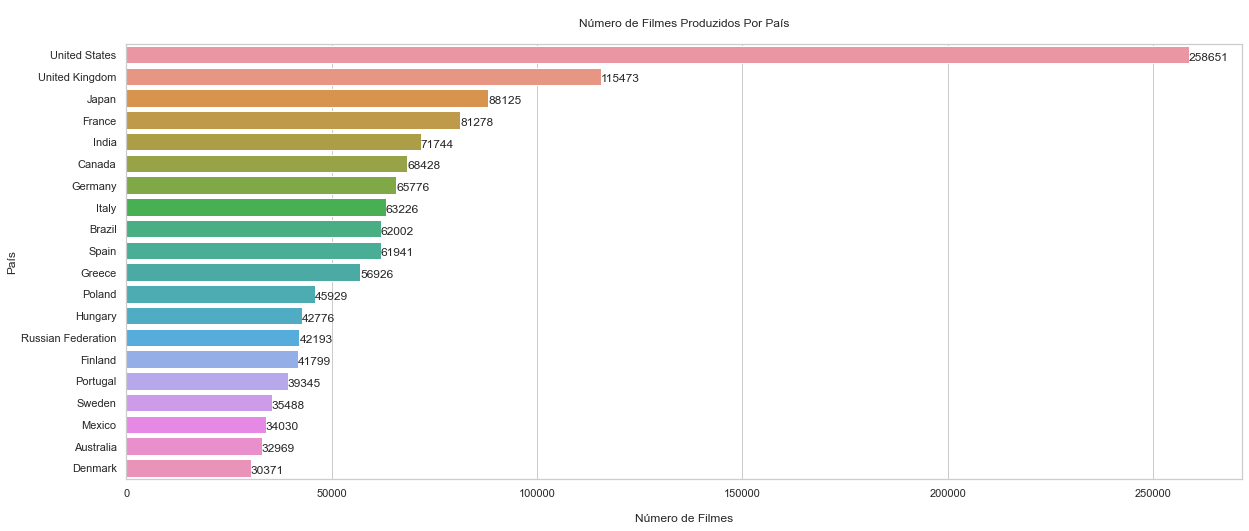

In [36]:
plt.figure(figsize=(20,8))
sns.barplot(y=df_filmes_paises[:20].country,x=df_filmes_paises[:20].Movie_Count,orient='h')

for i in range(0,20):
    plt.text(df_filmes_paises.Movie_Count[df_filmes_paises.index[i]]-1,
                i+0.25,
                round(df_filmes_paises['Movie_Count'][df_filmes_paises.index[i]],2))

plt.ylabel('País')             
plt.xlabel('\nNúmero de Filmes')
plt.title('\nNúmero de Filmes Produzidos Por País\n')
plt.show()